In [214]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as MSE, r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score as RMSE 
from sklearn.ensemble import GradientBoostingClassifier
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder, DecisionTreeEncoder
from feature_engine import encoding as ce
from feature_engine.encoding import WoEEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser 
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
    from feature_engine.selection import SmartCorrelatedSelection

from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV 

from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix

In [52]:
data = pd.read_csv('../houseprice.csv')
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [53]:
del data ['FireplaceQu']

In [54]:
del data ['PoolQC']

In [55]:
del data ['Fence']

In [56]:
del data ['MiscFeature']

In [57]:
del data ['MSZoning']

In [58]:
del data ['Alley']

In [59]:
data.tail()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [60]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(labels = ['SalePrice', 'Id'], axis = 1),
                                                   data.SalePrice,
                                                   test_size=0.3,
                                                   random_state=0)
x_train.shape, x_test.shape

((1022, 73), (438, 73))

In [61]:
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452


In [62]:
x_train

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
64,60,NaN,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,36,0,0,0,0,0,2,2009,WD,Normal
682,120,NaN,2887,Pave,Reg,HLS,AllPub,Inside,Gtl,ClearCr,...,0,0,0,0,0,0,11,2008,WD,Normal
960,20,50.0,7207,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,...,0,0,0,0,0,0,2,2010,WD,Normal
1384,50,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,0,10,2009,WD,Normal
1100,30,60.0,8400,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,...,0,0,0,0,0,0,1,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,...,128,0,0,180,0,0,7,2009,WD,Normal
835,20,60.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,0,0,0,0,2,2010,WD,Normal
1216,90,68.0,8930,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,0,0,0,0,4,2010,WD,Normal
559,120,NaN,3196,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,...,20,0,0,0,0,0,10,2006,WD,Normal


In [63]:
x_test

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
529,20,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,...,0,200,0,0,0,0,3,2007,WD,Alloca
491,50,79.0,9490,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,32,0,0,0,0,8,2006,WD,Normal
459,50,NaN,7015,Pave,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,...,0,248,0,0,0,0,7,2009,WD,Normal
279,60,83.0,10005,Pave,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,...,117,0,0,0,0,0,3,2008,WD,Normal
655,160,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,...,0,0,0,0,0,0,3,2010,WD,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,20,73.0,39104,Pave,IR1,Low,AllPub,CulDSac,Sev,ClearCr,...,0,0,0,0,0,0,4,2008,WD,Normal
445,20,73.0,9855,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,...,0,0,0,0,0,0,11,2009,COD,Normal
654,20,91.0,10437,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,...,46,0,0,0,0,0,8,2008,WD,Normal
1280,20,67.0,9808,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,72,0,0,0,0,0,3,2009,WD,Normal


In [64]:
for var in x_train.columns:
    if x_train[var].isnull().sum() > 0:
        print(var, x_train[var].isnull().mean())

LotFrontage 0.18493150684931506
MasVnrType 0.004892367906066536
MasVnrArea 0.004892367906066536
BsmtQual 0.023483365949119372
BsmtCond 0.023483365949119372
BsmtExposure 0.023483365949119372
BsmtFinType1 0.023483365949119372
BsmtFinType2 0.02446183953033268
Electrical 0.0009784735812133072
GarageType 0.05283757338551859
GarageYrBlt 0.05283757338551859
GarageFinish 0.05283757338551859
GarageQual 0.05283757338551859
GarageCond 0.05283757338551859


In [65]:
for var in x_test.columns:
    if x_test[var].isnull().sum() > 0:
        print(var, x_test[var].isnull().mean())

LotFrontage 0.1598173515981735
MasVnrType 0.00684931506849315
MasVnrArea 0.00684931506849315
BsmtQual 0.02968036529680365
BsmtCond 0.02968036529680365
BsmtExposure 0.0319634703196347
BsmtFinType1 0.02968036529680365
BsmtFinType2 0.02968036529680365
GarageType 0.06164383561643835
GarageYrBlt 0.06164383561643835
GarageFinish 0.06164383561643835
GarageQual 0.06164383561643835
GarageCond 0.06164383561643835


In [66]:
print(x_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.values)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold']


In [67]:
numerical_train = x_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.values

In [68]:
numerical_train

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [69]:
print(x_train.select_dtypes(include = ['object']).columns.values)

['Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' 'KitchenQual' 'Functional' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType' 'SaleCondition']


In [70]:
categorical_train = x_train.select_dtypes(include = ['object']).columns.values

In [71]:
categorical_train

array(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

In [72]:
data.corr(method = "spearman")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,...,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,...,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,...,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,...,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,...,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,...,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,...,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,...,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,...,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,...,0.179359,0.081420,-0.148339,0.046802,0.071989,0.057586,0.005097,-0.016405,0.020793,0.301871


<AxesSubplot:>

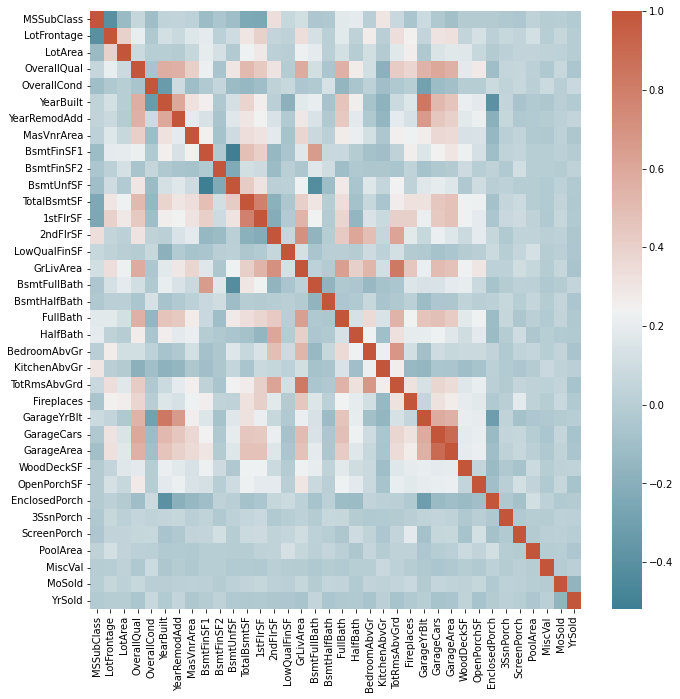

In [73]:
corrmat = x_train.corr(method = 'pearson')
cmap = sns.diverging_palette(220, 20, as_cmap = True)
fig, ax =plt.subplots()
fig.set_size_inches(11, 11)
sns.heatmap(corrmat, cmap = cmap, annot = None, linewidths=0)

In [74]:
for col in x_train.columns:
    print(col, ': ', len(x_train[col].unique()), 'labels')

MSSubClass :  15 labels
LotFrontage :  102 labels
LotArea :  790 labels
Street :  2 labels
LotShape :  4 labels
LandContour :  4 labels
Utilities :  2 labels
LotConfig :  5 labels
LandSlope :  3 labels
Neighborhood :  25 labels
Condition1 :  9 labels
Condition2 :  5 labels
BldgType :  5 labels
HouseStyle :  8 labels
OverallQual :  10 labels
OverallCond :  9 labels
YearBuilt :  107 labels
YearRemodAdd :  61 labels
RoofStyle :  6 labels
RoofMatl :  6 labels
Exterior1st :  15 labels
Exterior2nd :  16 labels
MasVnrType :  5 labels
MasVnrArea :  262 labels
ExterQual :  4 labels
ExterCond :  5 labels
Foundation :  6 labels
BsmtQual :  5 labels
BsmtCond :  5 labels
BsmtExposure :  5 labels
BsmtFinType1 :  7 labels
BsmtFinSF1 :  503 labels
BsmtFinType2 :  7 labels
BsmtFinSF2 :  113 labels
BsmtUnfSF :  627 labels
TotalBsmtSF :  573 labels
Heating :  6 labels
HeatingQC :  5 labels
CentralAir :  2 labels
Electrical :  6 labels
1stFlrSF :  617 labels
2ndFlrSF :  326 labels
LowQualFinSF :  18 label

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [76]:
numeric_vars = [var for var in x_train.columns if x_train[var].dtypes !='O'
               and var != 'SalePrice']

In [77]:
discrete = [var for var in x_train.columns if x_train[var].dtypes !='O'
           and var !='SalePrice' and x_train[var].nunique() <20]

In [78]:
num_list_1 = [var for var in numeric_vars if var not in discrete
           and var not in ['Id','SalePrice']]

In [79]:
num_list = num_list_1 + discrete

In [80]:
categorical_vars = [var for var in x_train.columns if x_train[var].dtype == 'O']  

In [81]:
cat_list = categorical_vars 

In [82]:
x_train[cat_list] = x_train[cat_list].astype('O')

In [88]:
x_test[cat_list] = x_test[cat_list].astype('O')

In [89]:
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [90]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [91]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [174]:
pipe_dtr = Pipeline([('imputer_num', MeanMedianImputer(imputation_method= 'median', variables=num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables=cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3)),
                 ('discretiser', EqualFrequencyDiscretiser (q = 6, return_object = True, variables=num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)),
                 ('constant', DropConstantFeatures(tol = 0.998, missing_values ='raise')),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('DTR', DecisionTreeRegressor(random_state= 0))])
               

In [175]:
dtr_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'encoder__encoding_method': ['ordered', 'arbitrary'],
    'discretiser__q': [5, 6, 7],
    'DTR__max_depth': [2, 3, 4, 5], 
    'DTR__criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']
}]

In [176]:
dtr_grid_search = GridSearchCV(estimator=pipe_dtr, param_grid = dtr_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [177]:
dtr_grid_search.fit(x_train, y_train)

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
624 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
192 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
                                                                     '2ndFlrSF',
                  

In [178]:
print("{} R2 score train set:{}".format('Decision Tree Regressor', dtr_grid_search.score(x_train, y_train)))
print("{} R2 score train set:{}".format('Decision Tree Regressor', dtr_grid_search.score(x_test, y_test)))

Decision Tree Regressor R2 score train set:0.8405925992844498
Decision Tree Regressor R2 score train set:0.7266770860259311


In [179]:
dtr_grid_search.best_params_

{'DTR__criterion': 'absolute_error',
 'DTR__max_depth': 5,
 'discretiser__q': 7,
 'encoder__encoding_method': 'arbitrary',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [180]:
pipe_knn = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)),
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998, variables = num_list + cat_list)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('KNN', KNeighborsRegressor())])

In [181]:
knn_param_grid = {
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'encoder__encoding_method': ['ordered', 'arbitrary'],
    'discretiser__bins': [8, 10, 12, 14],
    'KNN__weights': ['uniform', 'distance'], 
    'KNN__n_neighbors': [3, 5, 7, 9, 11],
    'KNN__metric': ['minkowski', 'euclidean'], 
    'KNN__leaf_size': [3, 4, 5, 7, 10, 30]
}

In [182]:
knn_grid_search = GridSearchCV(estimator = pipe_knn, param_grid = knn_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [183]:
knn_grid_search.fit(x_train, y_train)

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 19200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [184]:
print("{} R2 score train set:{}".format('KNN', knn_grid_search.score(x_train, y_train)))
print("{} R2 score train set:{}".format('KNN', knn_grid_search.score(x_test, y_test)))

KNN R2 score train set:0.9999999999999964
KNN R2 score train set:0.7639761557957387


In [185]:
knn_grid_search.best_params_

{'KNN__leaf_size': 3,
 'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 11,
 'KNN__weights': 'distance',
 'discretiser__bins': 10,
 'encoder__encoding_method': 'ordered',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'median'}

In [116]:
pipe_lr = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)), 
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998, variables = num_list + cat_list)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('LR', LinearRegression())])


In [117]:
lr_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'discretiser__bins': [8, 10, 12, 14],
    'encoder__encoding_method': ['ordered', 'arbitrary'],
    'LR__fit_intercept': [True, False], 
    'LR__copy_X': [True, False], 
    'LR__n_jobs': [-1, None],
}]

In [118]:
lr_grid_search = GridSearchCV(estimator=pipe_lr, param_grid = lr_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [119]:
lr_grid_search.fit(x_train, y_train)

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
128 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
128 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [120]:
print("{} R2 score train set:{}".format('Linear Regression', lr_grid_search.score(x_train, y_train)))
print("{} R2 score train set:{}".format('Linear Regression', lr_grid_search.score(x_test, y_test)))

Linear Regression R2 score train set:0.8835461263970219
Linear Regression R2 score train set:0.7842981256931201


In [121]:
lr_grid_search.best_params_

{'LR__copy_X': True,
 'LR__fit_intercept': True,
 'LR__n_jobs': -1,
 'discretiser__bins': 14,
 'encoder__encoding_method': 'arbitrary',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [126]:
pipe_lasso = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OneHotEncoder()),
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('Lasso', Lasso (random_state = 0))])
               

In [127]:
lasso_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'encoder__top_categories': [5, 7, 10, None],
    'discretiser__bins': [8, 10, 12],
    'Lasso__alpha': (1, 0),
    'Lasso__max_iter': [10, 100, 1000]
}]

In [128]:
lasso_grid_search = GridSearchCV(estimator=pipe_lasso, param_grid = lasso_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [129]:
lasso_grid_search.fit(x_train, y_train)

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
144 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:291: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:291: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:291: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:291: FutureWarning: Passi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [186]:
print("{} R2 score train set:{}".format('Lasso', lasso_grid_search.score(x_train, y_train)))
print("{} R2 score train set:{}".format('Lasso', lasso_grid_search.score(x_test, y_test)))

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

Lasso R2 score train set:0.8998073370527887


C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

Lasso R2 score train set:0.8068491798971691


C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[str(feature) + "_" + str(category)] = np.where(
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\encoding\one_hot.py:236: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

In [132]:
lasso_grid_search.best_params_

{'Lasso__alpha': 0,
 'Lasso__max_iter': 1000,
 'discretiser__bins': 12,
 'encoder__top_categories': 10,
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [200]:
pipe_xgb = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)),
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('XGB', XGBRegressor (random_state = 0))])

In [201]:
xgb_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'discretiser__bins': [8, 10, 12],
    'encoder__encoding_method': ['arbitrary', 'ordered'],
    'XGB__n_estimators': [100, 150], 
    'XGB__max_depth': [2, 3, 4, 5], 
    'XGB__learning_rate': [0.01, 0.05, 1] 
}]

In [202]:
xgb_grid_search = GridSearchCV(estimator=pipe_xgb, param_grid = xgb_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [203]:
xgb_grid_search.fit(x_train, y_train)

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:291: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:291: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\feature_engine\selection\smart_correlation_selection.py:291: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  f = X[feature_group].std().sort_values(ascending=False).index[0]
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [204]:
print("{} R2 score train set:{}".format('XGB', xgb_grid_search.score(x_train, y_train)))
print("{} R2 score train set:{}".format('XGB', xgb_grid_search.score(x_test, y_test)))

XGB R2 score train set:0.9831465638209311
XGB R2 score train set:0.8674215117040147


C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [206]:
xgb_grid_search.best_params_

{'XGB__learning_rate': 0.05,
 'XGB__max_depth': 5,
 'XGB__n_estimators': 150,
 'discretiser__bins': 10,
 'encoder__encoding_method': 'ordered',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [166]:
pipe_svr = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)),
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('SVR', SVR ())])

In [167]:
svr_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'encoder__encoding_method': ['ordered', 'arbitrary'],
    'discretiser__bins': [8, 10, 12],
    'SVR__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'SVR__gamma' : ['auto','scale']
}]

In [168]:
svr_grid_search = GridSearchCV(estimator=pipe_svr, param_grid = svr_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [169]:
svr_grid_search.fit(x_train, y_train)

C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\kmk\anaconda3\envs\AI\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  Fil

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [170]:
print("{} R2 score train set:{}".format('SVR', svr_grid_search.score(x_train, y_train)))
print("{} R2 score train set:{}".format('SVR', svr_grid_search.score(x_test, y_test)))

SVR R2 score train set:0.9718914643218043
SVR R2 score train set:0.8629447195258513


In [171]:
svr_grid_search.best_params_

{'SVR__gamma': 'scale',
 'SVR__kernel': 'poly',
 'discretiser__bins': 12,
 'encoder__encoding_method': 'ordered',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'median'}